# Handling of Missing Data:
##### 1. Missing Completely at Random--MCAR  
[When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.]
#### 2. Missing At Random(MAR)   
#### 3. Missing Data Not At Random(MNAR): 
[Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.]
#### 4. Mean/ MEdian /Mode imputation

**Other techniques of handling, Missing values**

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [11]:
df['Survived'].value_counts()/len(df)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

## Mean/Median/Mode Imputation

In [12]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df.tail()

,Survived,Age,Fare
886,0,27.0,13.00
887,1,19.0,30.00
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [18]:
median = df.Age.median()
print(median)

28.0


In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [21]:
impute_nan(df,'Age',median)
df.tail()

,Survived,Age,Fare,Age_median
886,0,27.0,13.00,27.0
887,1,19.0,30.00,19.0
888,0,NaN,23.45,28.0
889,1,26.0,30.00,26.0
890,0,32.0,7.75,32.0


In [23]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


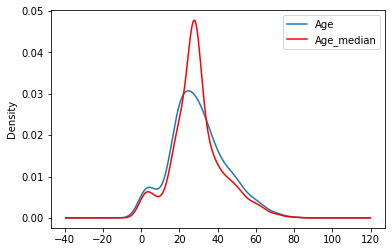

In [25]:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
####   Disadvantages
1.   Change or Distortion in the original variance
2. Impacts Correlation

### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [26]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [30]:
impute_nan(df,'Age',median)

In [32]:
df.tail()

,Survived,Age,Fare,Age_median,Age_random
886,0,27.0,13.00,27.0,27.0
887,1,19.0,30.00,19.0,19.0
888,0,NaN,23.45,28.0,15.0
889,1,26.0,30.00,26.0,26.0
890,0,32.0,7.75,32.0,32.0


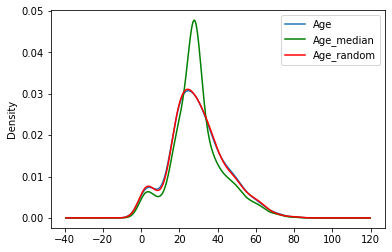

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='green')
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## End of Distribution imputation

In [ ]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

<AxesSubplot:>

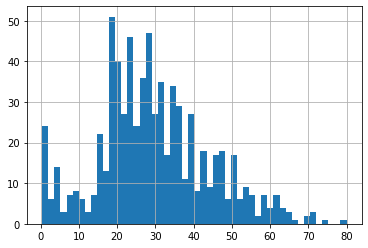

In [52]:
df.Age.hist(bins=50)

C:\Users\hanitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

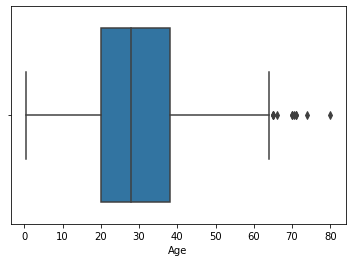

In [54]:
sns.boxplot('Age', data = df)

In [55]:
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [56]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [57]:
impute_nan(df,'Age',median,extreme)

In [58]:
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_end_distribution
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


<AxesSubplot:>

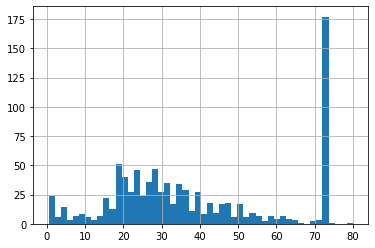

In [59]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\hanitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

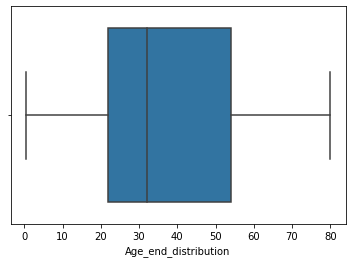

In [61]:
sns.boxplot('Age_end_distribution', data=df)

## Arbitrary Value Imputation

Filling NA with '0' / Constant values